![Banner logo](https://github.com/zackyndra23/Data_Science/blob/main/Banner1.jpg?raw=true)

# **The Most Profitable and Safest stock**
*by Zaky Indra Satria Putra

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pycaret[full]
!pip install shap
!pip install graphviz
!pip install dtreeviz

  Using cached interpret-0.6.0-py3-none-any.whl (1.4 kB)
  Using cached umap-learn-0.5.5.tar.gz (90 kB)
  Preparing metadata (setup.py) ... done
  Using cached PyYAML-5.3.1.tar.gz (269 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
# from dtreeviz.trees import *
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from pycaret.classification import *

# Preparasi Data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Mediawave Project/data/stock_portfolio_clean.csv')
df

,Company,Sector,Date,Horizon_days,Open,High,Low,Close,Adj_Close,Volume,Investment
0,AALI,AUTO,2001-04-05,94.0,571.710999,571.710999,547.888977,547.888977,295.594818,57722.0,BAD
1,AALI,AUTO,2001-04-06,95.0,547.888977,547.888977,547.888977,547.888977,295.594818,83434.0,BAD
2,AALI,AUTO,2001-04-09,98.0,547.888977,547.888977,547.888977,547.888977,295.594818,10495.0,BAD
3,AALI,AUTO,2001-04-10,99.0,547.888977,547.888977,547.888977,547.888977,295.594818,352626.0,BAD
4,AALI,AUTO,2001-04-11,100.0,547.888977,547.888977,547.888977,547.888977,295.594818,59296.0,BAD
...,...,...,...,...,...,...,...,...,...,...,...
93701,WSKT,CONSTRUCT,2017-08-31,242.0,2250.000000,2270.000000,2210.000000,2220.000000,2220.000000,10656000.0,BAD
93702,WSKT,CONSTRUCT,2017-09-01,243.0,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,0.0,BAD
93703,WSKT,CONSTRUCT,2017-09-04,246.0,2220.000000,2230.000000,2130.000000,2140.000000,2140.000000,17671000.0,BAD
93704,WSKT,CONSTRUCT,2017-09-05,247.0,2140.000000,2150.000000,2050.000000,2100.000000,2100.000000,22314300.0,BAD


In [5]:
investment_map = {'GOOD':1, 'BAD':0}
df = df.applymap(lambda s: investment_map.get(s) if s in investment_map else s)

In [6]:
company_map = {'AALI':0, 'ADHI':1, 'ADRO':2, 'AKRA':3, 'ANTM':4, 'ASII':5,
               'ASRI':6, 'BBCA':7, 'BBNI':8, 'BBRI':9, 'BBTN':10,
               'BMRM':11, 'BSDE':12, 'BUMI':13, 'CPIN':14, 'ELSA':15,
               'EXCL':16, 'GGRM':17, 'HMSP':18, 'ICBP':19, 'INCO':20,
               'INDF':21, 'INTP':22, 'JSMR':23, 'KLBF':24, 'LPKR':25,
               'LPPF':26, 'LSIP':27, 'MNCN':28, 'MYRX':29, 'PGAS':30,
               'PPRO':31, 'PTBA':32, 'PTPP':33, 'PWON':34, 'SCMA':35,
               'SMGR':36, 'SMRA':37, 'SRIL':38, 'SSMS':39, 'TLKM':40,
               'UNTR':41, 'UNVR':42, 'WIKA':43, 'WSKT':44}

df = df.applymap(lambda s: company_map.get(s) if s in company_map else s)

In [7]:
# Mengekspor DataFrame df menjadi df_to_ml.csv
df.to_csv('/content/drive/MyDrive/Mediawave Project/Machine Learning/df_to_ml.csv', index=False)

In [8]:
sector_map = {'AUTO':0, 'BANK':1, 'CEMENT': 2 , 'CONSTRUCT': 3, 'ENER':4, 'FMCH':5,
              'INFRA':6, 'MINING':7, 'PAPER_TEXTILE':8, 'PROPERTY':9, 'TELE':10}

df = df.applymap(lambda s: sector_map.get(s) if s in sector_map else s)

In [9]:
df =df.drop(columns=['Date'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Investment',1),
                                                    df['Investment'],
                                                    test_size = 0.3,
                                                    random_state = 2024)

In [11]:
# Mendefinisikan klasifikasi
dt4 = DecisionTreeClassifier(random_state=2024, max_depth=4)

# Melatih klasifikasi dengan dataset latih
dt4.fit(X_train, y_train)

# Evaluasi pada dataset latih
dt4_score_train = dt4.score(X_train, y_train)
# Evaluasi pada dataset uji
dt4_score_test = dt4.score(X_test, y_test)

In [12]:
print('{:1} {:>23} {:>20}'.format(4, dt4_score_train, dt4_score_test))

4      0.8507180534805012   0.8526963574274331


In [13]:
features = list(df.columns)
features = features[:-1]
features

['Company',
 'Sector',
 'Horizon_days',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj_Close',
 'Volume']

In [14]:
importances = dt4.feature_importances_

In [15]:
df_feature_importance = pd.DataFrame({'Features': features, 'Importances': dt4.feature_importances_ })

In [16]:
df_view = df_feature_importance.sort_values(by='Importances', ascending=False)
df_view

,Features,Importances
8,Volume,0.720587
1,Sector,0.133616
3,Open,0.100764
7,Adj_Close,0.026066
0,Company,0.018967
2,Horizon_days,0.000000
4,High,0.000000
5,Low,0.000000
6,Close,0.000000


<BarContainer object of 9 artists>

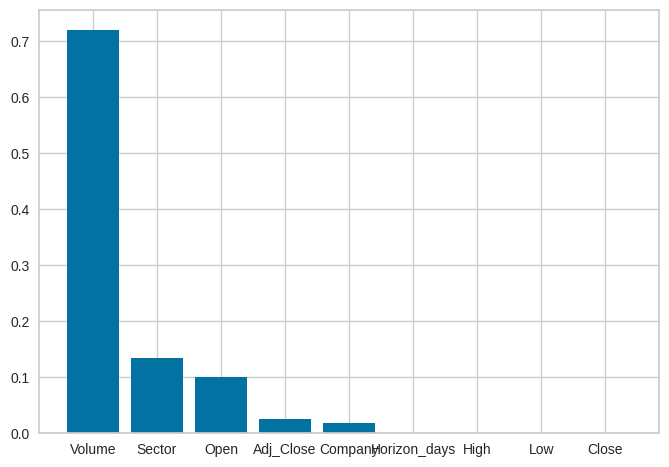

In [17]:
plt.bar(df_view['Features'], df_view['Importances'])

In [18]:
graph_dt = dt4

In [19]:
model_dt = graph_dt.fit(X_train,y_train)

In [20]:
X = df.drop('Investment',1)
y = df['Investment']

In [21]:
features

['Company',
 'Sector',
 'Horizon_days',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj_Close',
 'Volume']

In [22]:
# !pip uninstall dtreeviz
!pip install dtreeviz
!pip install --upgrade graphviz dtreeviz

In [23]:
# from dtreeviz.trees import *
# viz = dtreeviz(model_dt, X, y,
#                 target_name="Investment",
#                 feature_names=['Company','Sector','Horizon_days','Open','High','Low','Close','Adj_Close','Volume'],
#                 class_names=["BAD", "GOOD"])
# viz.save('/content/drive/MyDrive/Mediawave Project/Data Analysis/finalDF_decision_tree_GOOD_FOR_MEDIUM.svg')
# viz

# Pemilihan Model

In [56]:
df = pd.read_csv('/content/drive/MyDrive/Mediawave Project/Machine Learning/df_to_ml.csv')
df = df[['Company', 'Sector', 'Horizon_days', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Investment']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93706 entries, 0 to 93705
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       93706 non-null  int64  
 1   Sector        93706 non-null  object 
 2   Horizon_days  93706 non-null  float64
 3   Open          93706 non-null  float64
 4   High          93706 non-null  float64
 5   Low           93706 non-null  float64
 6   Close         93706 non-null  float64
 7   Adj_Close     93706 non-null  float64
 8   Volume        93706 non-null  float64
 9   Investment    93706 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 7.1+ MB


In [55]:
df2 = pd.read_csv('/content/drive/MyDrive/Mediawave Project/data/data_machineLearning.csv')
df2 = df2[['Company', 'Sector', 'Horizon_days', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume', 'Investment']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98638 entries, 0 to 98637
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       98638 non-null  object 
 1   Sector        98638 non-null  object 
 2   Horizon_days  98638 non-null  float64
 3   Open          98638 non-null  float64
 4   High          98638 non-null  float64
 5   Low           98638 non-null  float64
 6   Close         98638 non-null  float64
 7   Adj_Close     98638 non-null  float64
 8   Volume        98638 non-null  float64
 9   Investment    98638 non-null  object 
dtypes: float64(7), object(3)
memory usage: 7.5+ MB


In [57]:
df['Investment'].value_counts()

0    79743
1    13963
Name: Investment, dtype: int64

In [58]:
df2['Investment'].value_counts()

BAD     83873
GOOD    14765
Name: Investment, dtype: int64

In [61]:
ml_model = setup(df, session_id = 2024, train_size = 0.7, fold_strategy = 'stratifiedkfold', target = 'Investment')

,Description,Value
0,Session id,2024
1,Target,Investment
2,Target type,Binary
3,Original data shape,"(93706, 10)"
4,Transformed data shape,"(93706, 20)"
5,Transformed train set shape,"(65594, 20)"
6,Transformed test set shape,"(28112, 20)"
7,Numeric features,8
8,Categorical features,1
9,Preprocess,True


In [42]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9816,0.0000,0.8860,0.9894,0.9346,0.9240,0.9260,2.5710
xgboost,Extreme Gradient Boosting,0.9164,0.0000,0.4744,0.9304,0.6282,0.5866,0.6291,1.0090
et,Extra Trees Classifier,0.8961,0.0000,0.3813,0.8290,0.5223,0.4728,0.5180,6.9090
rf,Random Forest Classifier,0.8883,0.0000,0.3266,0.8115,0.4656,0.4156,0.4698,14.5370
lightgbm,Light Gradient Boosting Machine,0.8832,0.0000,0.2279,0.9490,0.3670,0.3285,0.4323,4.6650
lda,Linear Discriminant Analysis,0.8764,0.0000,0.1931,0.8959,0.3176,0.2795,0.3819,0.3330
ridge,Ridge Classifier,0.8672,0.0000,0.1172,0.9319,0.2082,0.1810,0.3038,0.2610
gbc,Gradient Boosting Classifier,0.8538,0.0000,0.0274,0.7694,0.0529,0.0431,0.1270,14.1090
ada,Ada Boost Classifier,0.8512,0.0000,0.0049,0.6051,0.0097,0.0072,0.0414,3.2740
dummy,Dummy Classifier,0.8510,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [63]:
ml_model2 = setup(df2, session_id = 2024, train_size = 0.7, fold_strategy = 'stratifiedkfold', target = 'Investment')

,Description,Value
0,Session id,2024
1,Target,Investment
2,Target type,Binary
3,Target mapping,"BAD: 0, GOOD: 1"
4,Original data shape,"(98638, 10)"
5,Transformed data shape,"(98638, 20)"
6,Transformed train set shape,"(69046, 20)"
7,Transformed test set shape,"(29592, 20)"
8,Numeric features,7
9,Categorical features,2


In [64]:
best_models2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9891,0.0000,0.9891,0.9891,0.9889,0.9560,0.9566,3.1840
xgboost,Extreme Gradient Boosting,0.9134,0.0000,0.9134,0.9148,0.9005,0.5694,0.6155,1.6090
et,Extra Trees Classifier,0.8938,0.0000,0.8938,0.8869,0.8767,0.4642,0.5079,8.0320
rf,Random Forest Classifier,0.8869,0.0000,0.8869,0.8785,0.8662,0.4139,0.4651,15.6760
lightgbm,Light Gradient Boosting Machine,0.8794,0.0000,0.8794,0.8894,0.8438,0.2972,0.4097,4.7150
lda,Linear Discriminant Analysis,0.8658,0.0000,0.8658,0.8654,0.8202,0.1851,0.2952,0.6070
ridge,Ridge Classifier,0.8599,0.0000,0.8599,0.8635,0.8059,0.1158,0.2315,0.5280
gbc,Gradient Boosting Classifier,0.8520,0.0000,0.8520,0.8294,0.7882,0.0319,0.1020,15.6820
ada,Ada Boost Classifier,0.8506,0.0000,0.8506,0.8060,0.7849,0.0165,0.0621,3.7650
dummy,Dummy Classifier,0.8503,0.0000,0.8503,0.7230,0.7815,0.0000,0.0000,0.6770


Processing:   0%|          | 0/65 [00:00<?, ?it/s]